**بسم الله الرحمن الرحيم**

# What is Linear Regression

<span style="font-size: 17px;">
    
### Model Equation
In Linear Regression, the model attempts to predict the target variable \( y \) from the input features \( X \) using a linear relationship:

$$
y = Xw + b
$$

Where:
- \( y \) is the vector of predicted outputs.
- \( X \) is the matrix of input features with dimensions \( m x n \), where \( m \) is the number of samples and \( n \) is the number of features.
- \( w \) is the vector of weights (or coefficients) for the features.
- \( b \) is the bias (intercept) term.
- \( m \) is the number of samples (data points), and \( n \) is the number of features.

<span style="font-size: 16px;">
    
### Goal
The goal of Linear Regression is to find the weights $ w $ and bias $ b $ that minimize the **Mean Squared Error (MSE)** between the predicted values $ \hat{y} $ and the actual values $ y $.





<span style="font-size: 17px;">
    
### Loss Function (MSE)
The **Mean Squared Error (MSE)** is used as the loss function to quantify the difference between predicted and actual values:

$$
\text{MSE} = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
$$

Where:
$$ \hat{y}_i = X_i \cdot w + b $$
<center>is the prediction for the \(i\)-th sample.</center>
<br>

$$ y_i $$
<center>is the actual target value for the \(i\)-th sample.</center>
<br>
  
$$ m $$
<center>is the number of training examples.</center>
<br>
This MSE function penalizes larger differences between the predicted and true values.



# Libs

In [1]:
#!pip install opendatasets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# import opendatasets as od

# Dataset (Student Performance)

## Download

In [3]:
# if using other notebooks uncomment this line to download the csv file
# od.download('https://www.kaggle.com/datasets/andonians/random-linear-regression')
# train_path = '/random-linear-regression/train.csv'
# test_path = '/random-linear-regression/test.csv'

In [4]:
#if using kaggle
train_path = '/kaggle/input/random-linear-regression/train.csv'
test_path = '/kaggle/input/random-linear-regression/test.csv'

In [5]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
train_df.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


## Preprocessing

### Train

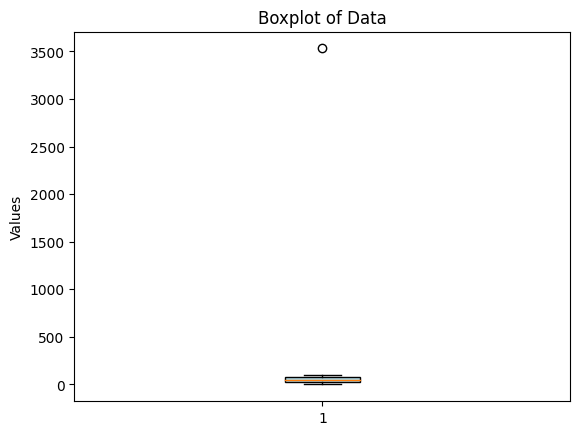

In [6]:
plt.boxplot(train_df['x'], vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplot of Data")
plt.ylabel("Values")
plt.show()

In [7]:
X_train = np.array(train_df['x'][train_df['x'] <= 100.])[:, None]

y_train = np.array(train_df['y'][train_df['x'] <= 100.])[:, None]

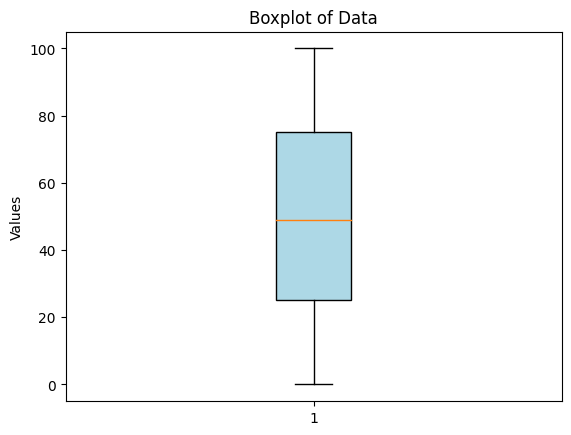

In [8]:
plt.boxplot(X_train, vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplot of Data")
plt.ylabel("Values")
plt.show()

### Test

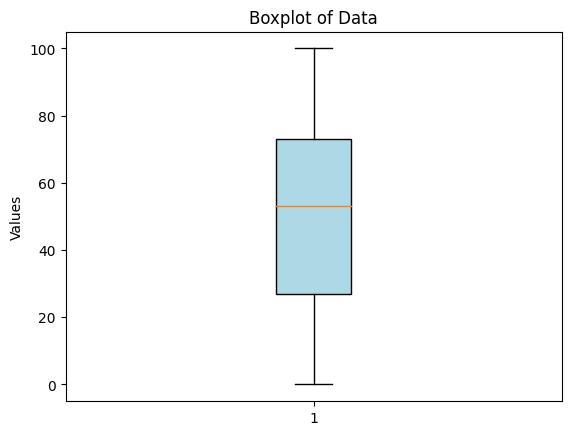

In [9]:
plt.boxplot(test_df['x'], vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplot of Data")
plt.ylabel("Values")
plt.show()

In [10]:
X_test = np.array(test_df['x'])[:, None]
y_test = np.array(test_df['y'])[:, None]

In [11]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)

In [12]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (699, 1)
Shape of X_test: (300, 1)


# Model

<span style="font-size: 17px;">

### Steps in the `LinearReg` Class:
1. **Initialization**:
   - $ w = 0 $, $ b = 0 $ (initial weights and bias are set to zero).
   - $ X $ is the feature matrix, $ y $ is the target vector.
   - 
<br>

2. **Prediction**:
   - For a given input $ X $, the predicted value $ \hat{y} $ is:
     $$
     \hat{y} = X \cdot w + b
     $$

3. **Loss Calculation**:
   - Compute the difference between the predicted and actual values using the MSE formula.

4. **Gradient Calculation**:
   - Compute the gradients for the weights and bias, as mentioned earlier.

5. **Update Parameters**:
   - Adjust the weights and bias using the learning rate and the computed gradients.

In [14]:
class LinearReg():
    # Initialization of the Linear Regression model
    def __init__(self, learningRate, iterations, data):
        # Learning rate to control how much we update the model per iteration
        self.learningRate = learningRate
        # Number of iterations to train the model
        self.iterations = iterations
        # Splitting the input data into features (X) and target variable (y)
        self.X, self.y = data
        # Getting the number of samples and features from the data
        self.samples, self.features = self.X.shape
        # Initializing weights as zero for each feature
        self.weights = np.zeros(self.features)
        # Initializing the bias term as zero
        self.bias = 0

    # The fitting method, where the model learns the data
    def fit(self):
        # Iterating through the number of training iterations
        for it in range(self.iterations):
            # Every 100 iterations, plot the progress of learning
            if (it+1) % 100 == 0:
                # Using the current weights and bias to make predictions
                yHat = self.predict(self.X)
                
                # Plotting the original data points
                plt.scatter(self.X, self.y, color="blue", label="Data Points")
                # Plotting the predictions of the model
                plt.plot(self.X, yHat, color="red", label="Prediction")
                # Title of the plot showing the current iteration number
                plt.title("iteration no." + str(it+1))
                plt.xlabel("X")  # Label for x-axis
                plt.ylabel("y")  # Label for y-axis
                plt.show()  # Display the plot
                clear_output(wait=True)  # Clears previous plots to show the current one

            # Update the model's weights and bias using the gradient descent algorithm
            self.update()
            
    # Method to update the weights and bias using gradient descent
    def update(self):
        # Make predictions using the current model's parameters
        yHat = self.predict(self.X)
        
        # Compute the gradient of the weights (dW) and bias (db) using the Mean Squared Error loss function
        dW = - ( 2 * ( self.X.T ).dot( self.y - yHat )  ) / self.samples  # Gradient for weights
        db = - 2 * np.sum( self.y - yHat ) / self.samples  # Gradient for bias

        # Update weights using the learning rate and the gradient
        self.weights = self.weights - self.learningRate * dW
        
        # Update bias using the learning rate and the gradient
        self.bias = self.bias - self.learningRate * db

    # Method to make predictions with the current weights and bias
    def predict(self, X):
        # Predicting the output as a linear combination of the features (X) and the weights, plus the bias term
        return X.dot(self.weights) + self.bias

<span style="font-size: 17px;">

### Example of Linear Regression in the Context of the Code:
1. **Training**:
   - The `fit()` method loops over the number of training iterations.
   - During each iteration, the model computes the predicted values $ \hat{y} $ using the current weights and bias.
   - The loss is calculated, and then the weights and bias are updated using the gradients.
   - Every 100 iterations, the model visualizes the current predictions and data points.

2. **Prediction**:
   - After training, the model can predict new values for input data $ X $ using:
     $$
     \hat{y} = X \cdot w + b
     $$

This process gradually adjusts the model's parameters (weights and bias) to fit the data by minimizing the loss, resulting in a better fit to the training data.

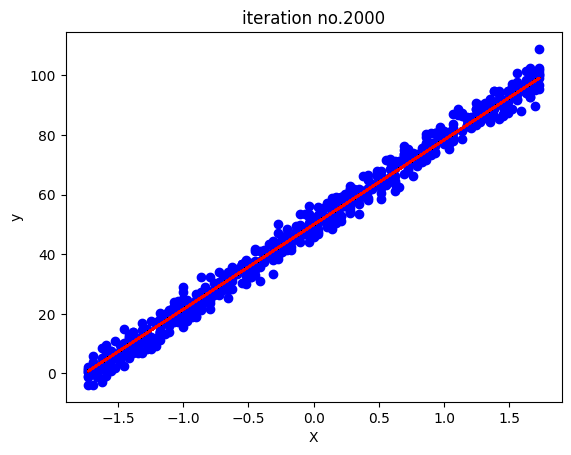

In [15]:
model = LinearReg(learningRate=0.001, iterations=2000, data=(X_train, y_train))
model.fit()

# Evaluate

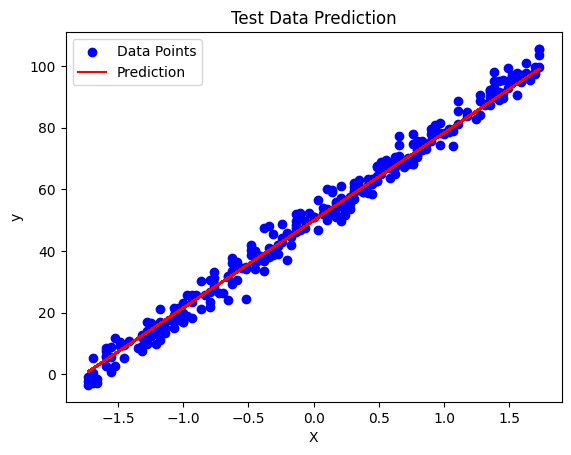

In [16]:
scatter = plt.scatter(X_test, y_test, color="blue", label="Data Points")
line = plt.plot(X_test, model.predict(X_test), color="red", label="Prediction")[0]
plt.title("Test Data Prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(handles=[scatter, line])
plt.show()